## Proyecto 2: Segmentación de Clientes
----------

### Requisitos:

1. Crear perfiles de clientes resumiendo las ventas totales y el beneficio total por cliente.
2. Agrupar a los clientes por segmento de mercado y proporcionar el número total de clientes, el promedio de ventas por cliente y el beneficio total por segmento.
3. Identificar a los 10 principales clientes según las ventas totales y sus respectivas regiones.
4. Identificar los productos más populares en cada segmento de mercado.
5. Analizar la frecuencia de compra de los clientes.

## 1. Crear perfiles de clientes resumiendo las ventas totales y el beneficio total por cliente.

    customer_id    customer_name  total_sales  total_profit
642    SV-20365      Seth Vernon     8332.090      688.3981
318    JE-15715       Joe Elijah     6920.136      968.0821
521    PF-19120     Peter Fuller     6837.348      117.0058
128    CJ-12010  Caroline Jumper     6267.194     -494.9106
277    GT-14710        Greg Tran     6219.260      268.6073


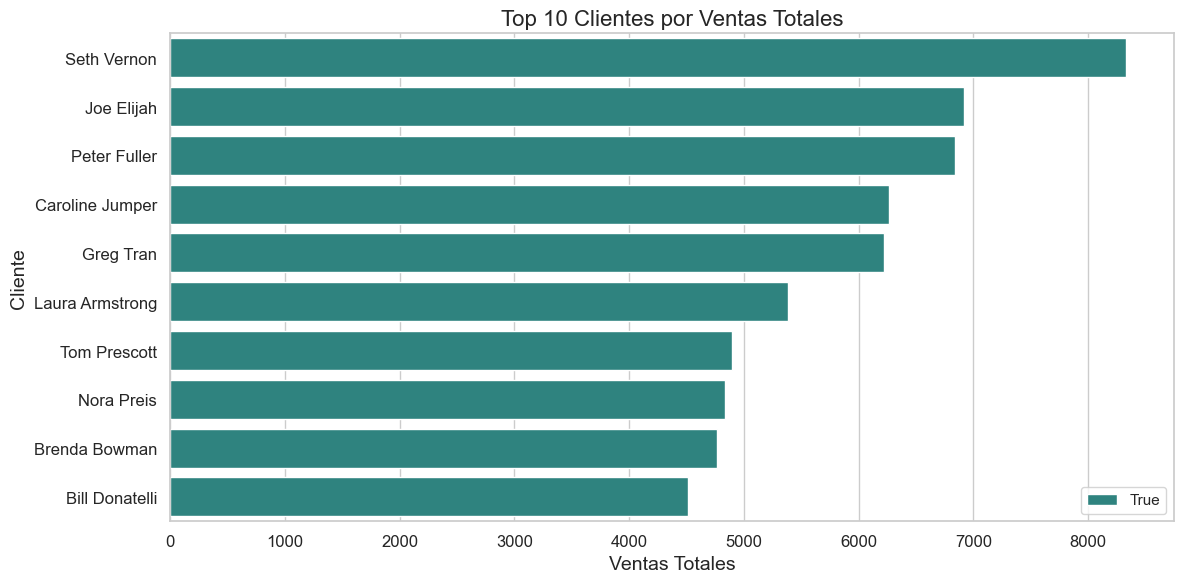

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar los datos del archivo Excel
file_path = './furniture (1).xlsx'
data = pd.read_excel(file_path, sheet_name='sales')

# Asegurarse de que las columnas necesarias estén en el formato correcto
data['total_sales'] = pd.to_numeric(data['total_sales'], errors='coerce')
data['profit'] = pd.to_numeric(data['profit'], errors='coerce')

# Resumir las ventas totales y las ganancias totales por cliente
customer_profiles = data.groupby('customer_id').agg(
    customer_name=('customer_name', 'first'),
    total_sales=('total_sales', 'sum'),
    total_profit=('profit', 'sum')
).reset_index()

# Ordenar los resultados por ventas totales en orden descendente
customer_profiles = customer_profiles.sort_values(by='total_sales', ascending=False)

# Mostrar los perfiles de clientes
print(customer_profiles.head())

# Crear una visualización de los principales clientes
top_customers = customer_profiles.head(10)  # Seleccionar los 10 principales clientes
plt.figure(figsize=(12, 6))

# Gráfico de barras
sns.barplot(
    x='total_sales',
    y='customer_name',
    hue = True,
    data=top_customers,
    palette='viridis'
)

plt.title('Top 10 Clientes por Ventas Totales', fontsize=16)
plt.xlabel('Ventas Totales', fontsize=14)
plt.ylabel('Cliente', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()


## 2. Agrupar clientes por segmento de mercado y proporcionar el número total de clientes, las ventas promedio por cliente y el beneficio total por segmento.

  market_segment  total_clientes  ventas_promedio_por_cliente  beneficio_total
0       Consumer             368                   408.193436        6991.0786
1      Corporate             211                   384.261386        7584.8158
2    Home Office             128                   352.400860        3875.3784


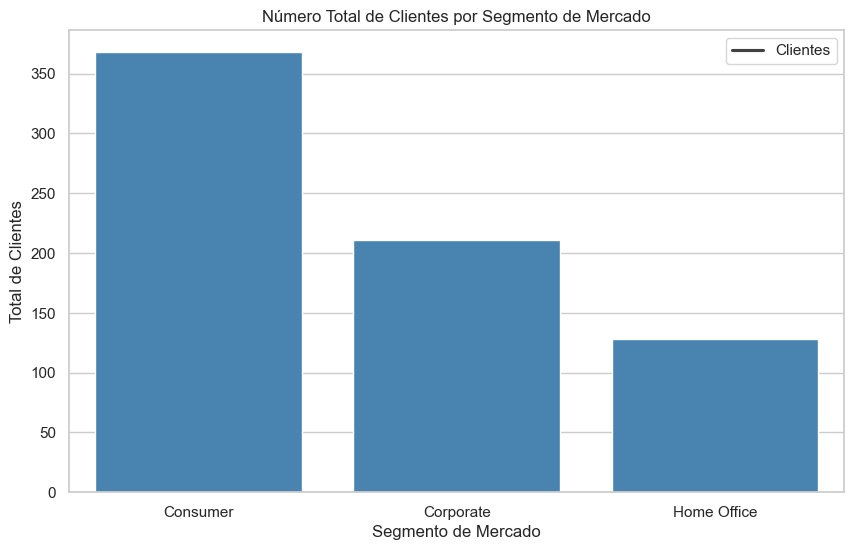

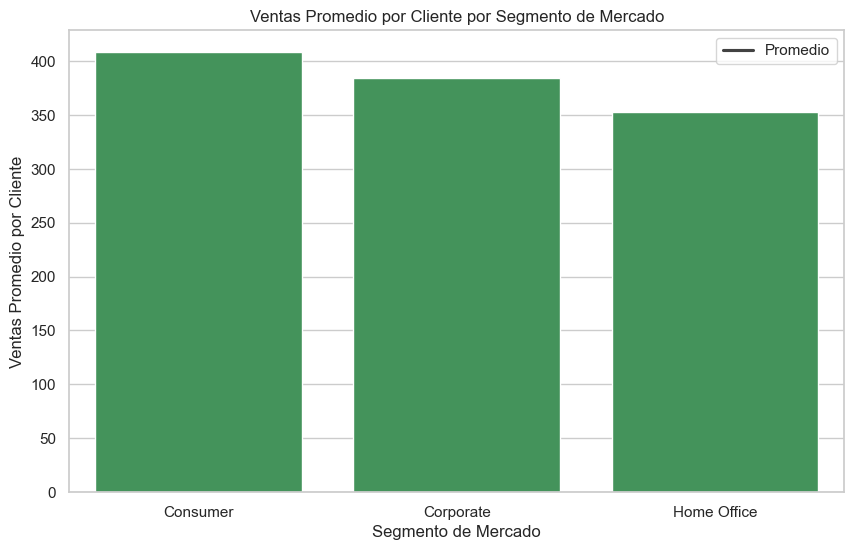

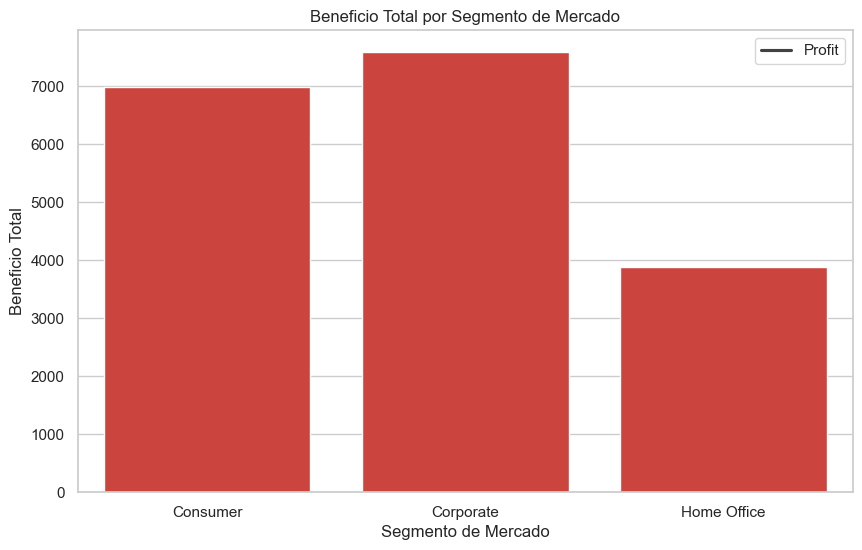

In [19]:
# Agrupar por segmento de mercado
resultado = data.groupby('market_segment').agg(
    total_clientes=('customer_id', 'nunique'),  # Número total de clientes únicos
    ventas_promedio_por_cliente=('total_sales', lambda x: x.sum() / x.nunique()),  # Ventas promedio por cliente
    beneficio_total=('profit', 'sum')  # Beneficio total
).reset_index()

# Mostrar el resultado
print(resultado)# Crear un gráfico de barras para el número total de clientes por segmento
plt.figure(figsize=(10, 6))
sns.barplot(x='market_segment', y='total_clientes', hue= True, data=resultado, palette='Blues_d')
plt.title('Número Total de Clientes por Segmento de Mercado')
plt.xlabel('Segmento de Mercado')
plt.ylabel('Total de Clientes')
plt.legend(["Clientes"])
plt.show()

# Crear un gráfico de barras para las ventas promedio por cliente por segmento
plt.figure(figsize=(10, 6))
sns.barplot(x='market_segment', y='ventas_promedio_por_cliente', hue= True, data=resultado, palette='Greens_d')
plt.title('Ventas Promedio por Cliente por Segmento de Mercado')
plt.xlabel('Segmento de Mercado')
plt.ylabel('Ventas Promedio por Cliente')
plt.legend(["Promedio"])
plt.show()

# Crear un gráfico de barras para el beneficio total por segmento
plt.figure(figsize=(10, 6))
sns.barplot(x='market_segment', y='beneficio_total', hue= True, data=resultado, palette='Reds_d')
plt.title('Beneficio Total por Segmento de Mercado')
plt.xlabel('Segmento de Mercado')
plt.ylabel('Beneficio Total')
plt.legend(["Profit"])
plt.show()

## 3. Identificar a los 10 principales clientes según las ventas totales y sus respectivas regiones.

            customer_name region  total_sales
1040         Peter Fuller   East    6432.3880
1174          Seth Vernon   East    6122.5480
522             Greg Tran   East    5319.8300
1289         Tom Prescott   East    4738.7640
989            Nora Preis   West    4630.5105
1054         Quincy Jones   East    4404.9000
662           Joseph Holt  South    4297.6440
1247    Tamara Willingham   West    4208.4560
831   Maribeth Schnelling   West    4009.7560
435         Ellis Ballard   West    3844.8320


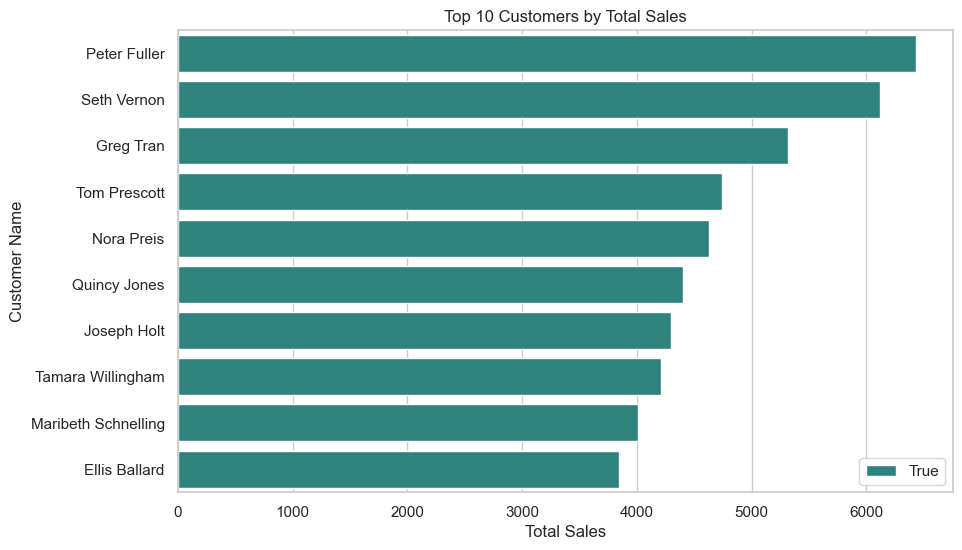

In [20]:
# Group by customer and region, then calculate total sales per customer
top_customers = data.groupby(['customer_name', 'region'])['total_sales'].sum().reset_index()

# Sort by total sales in descending order and select the top 10 customers
top_10_customers = top_customers.sort_values(by='total_sales', ascending=False).head(10)
print(top_10_customers)
# Plot the top 10 customers
plt.figure(figsize=(10, 6))
sns.barplot(x='total_sales', y='customer_name',hue = True, data=top_10_customers, palette='viridis')
plt.title('Top 10 Customers by Total Sales')
plt.xlabel('Total Sales')
plt.ylabel('Customer Name')
plt.show()

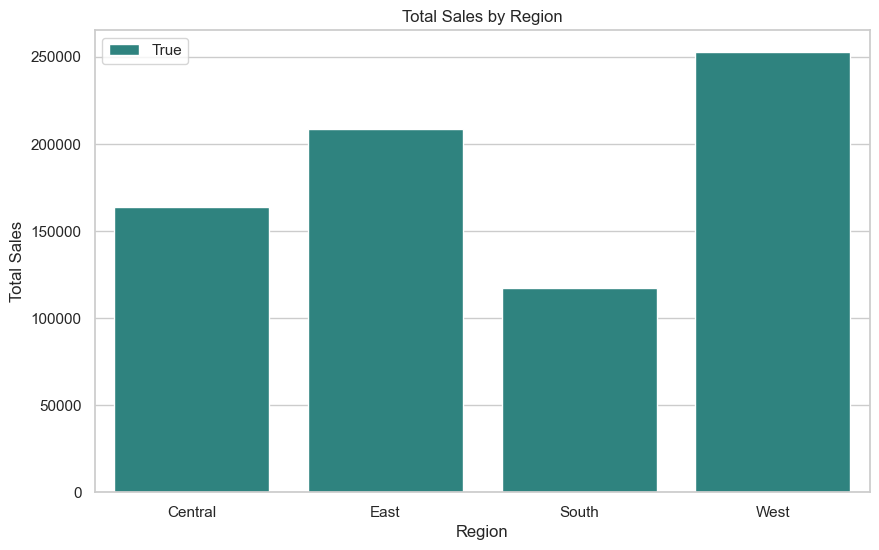

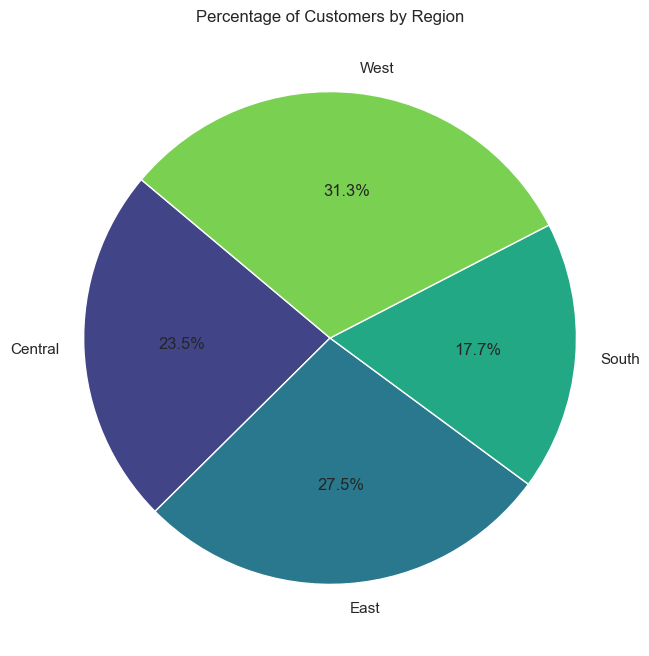

In [21]:
# Group by region and calculate total sales and number of customers
region_data = data.groupby('region').agg(
    total_sales=('total_sales', 'sum'),  # Total sales per region
    total_customers=('customer_id', 'nunique')  # Unique customers per region
).reset_index()

# Set the style for the plots
sns.set(style="whitegrid")

# Bar chart for total sales by region
plt.figure(figsize=(10, 6))
sns.barplot(x='region', y='total_sales',hue = True, data=region_data, palette='viridis')
plt.title('Total Sales by Region')
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.show()

# Pie chart for the number of customers by region
plt.figure(figsize=(8, 8))
plt.pie(region_data['total_customers'], labels=region_data['region'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette('viridis', len(region_data)))
plt.title('Percentage of Customers by Region')
plt.show()

## 4. Identificar los productos más populares en cada segmento de mercado.

In [22]:
# Agrupar los datos por 'market_segment' y 'product_name', sumando las 'quantity'
grouped_data = data.groupby(['market_segment', 'product_name'])['quantity'].sum().reset_index()

# Encontrar el producto más popular en cada segmento de mercado
productos_populares = grouped_data.loc[grouped_data.groupby('market_segment')['quantity'].idxmax()]

# Mostrar los resultados
print("Productos más populares en cada segmento de mercado:")
print(productos_populares[['market_segment', 'product_name', 'quantity']])

Productos más populares en cada segmento de mercado:
    market_segment                               product_name  quantity
241       Consumer                 KI Adjustable-Height Table        41
506      Corporate  Global High-Back Leather Tilter, Burgundy        32
782    Home Office     Global Stack Chair without Arms, Black        31


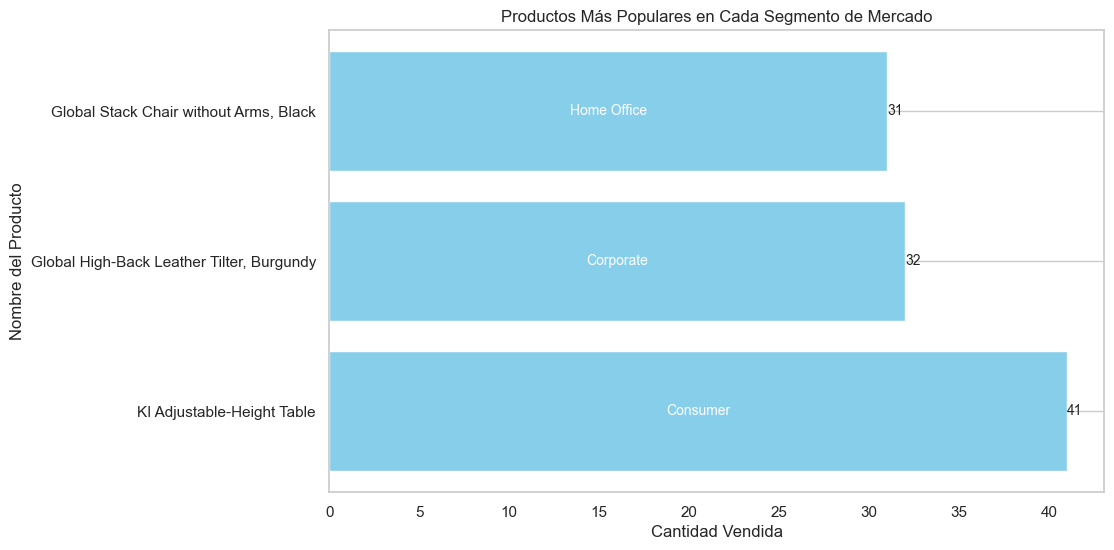

In [23]:
# Visualización
plt.figure(figsize=(10, 6))  # Definir el tamaño de la figura
bars = plt.barh(productos_populares['product_name'], productos_populares['quantity'], color='skyblue')  # Crear un gráfico de barras horizontales
plt.xlabel('Cantidad Vendida')  # Etiqueta del eje X
plt.ylabel('Nombre del Producto')  # Etiqueta del eje Y
plt.title('Productos Más Populares en Cada Segmento de Mercado')  # Título del gráfico
plt.grid(axis='x')  # Añadir una cuadrícula en el eje X

# Añadir etiquetas de segmento dentro de las barras y cantidades fuera
for index, bar in enumerate(bars):
    # Obtener el segmento correspondiente
    segmento = productos_populares['market_segment'].iloc[index]
    # Colocar el segmento dentro de la barra
    plt.text(bar.get_width() / 2, bar.get_y() + bar.get_height() / 2, segmento, 
             ha='center', va='center', color='white', fontsize=10)
    # Colocar la cantidad fuera de la barra
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, 
             f"{productos_populares['quantity'].iloc[index]}", 
             va='center', fontsize=10)

plt.show()  # Mostrar el gráfico

## 5. Analizar la frecuencia de compra de los clientes.

Frecuencia promedio de compra por cliente:
    customer_id  frecuency_average
0      AA-10315                NaN
1      AA-10375                NaN
2      AA-10480         844.000000
3      AA-10645         114.857143
4      AB-10015         978.000000
..          ...                ...
702    XP-21865         316.333333
703    YC-21895                NaN
704    YS-21880         377.000000
705    ZC-21910         159.857143
706    ZD-21925          32.000000

[707 rows x 2 columns]
La media en general de todos los clientes es: 310.12663010359535
La mediana en general de todos los clientes es: 251.5
El 25% de los clientes compran cada: 141.1 días o menos
Cantidad de clientes que compran todas las semanas: 34
Cantidad de clientes que compran al mes: 40


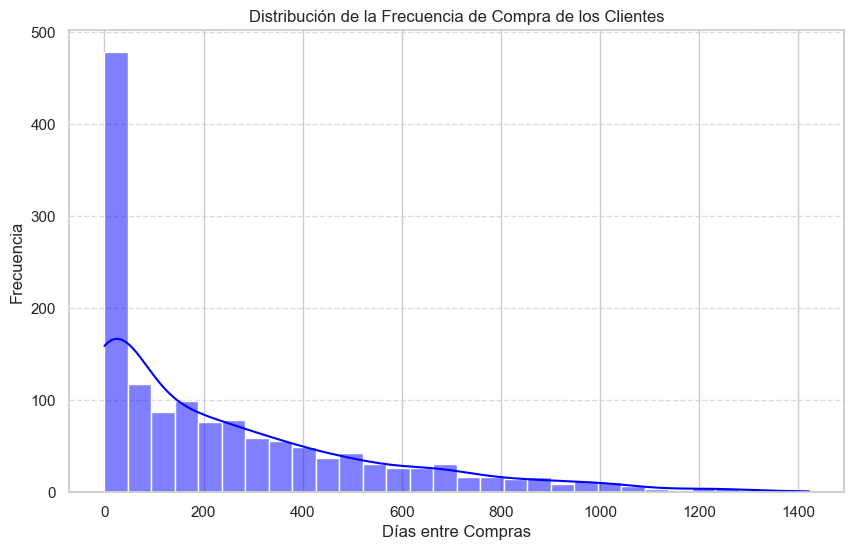

In [24]:
# Convertir la columna 'order_date' a formato de fecha
data['order_date'] = pd.to_datetime(data['order_date'])

# Ordenar los datos por 'customer_id' y 'order_date'
data = data.sort_values(by=['customer_id', 'order_date'])

# Calcular la diferencia de días entre compras consecutivas para cada cliente
data['days_between_purchases'] = data.groupby('customer_id')['order_date'].diff().dt.days

# Calcular la frecuencia promedio de compra por cliente
frecuency = data.groupby('customer_id')['days_between_purchases'].mean().reset_index()

# Renombrar las columnas para mayor claridad
frecuency.columns = ['customer_id', 'frecuency_average']

# Mostrar los resultados
print("Frecuencia promedio de compra por cliente:")
print(frecuency)

# Calcular el promedio muestral y la mediana muestral
promedio_muestral = frecuency['frecuency_average'].mean()
mediana_muestral = frecuency['frecuency_average'].median()
cuartil1 = frecuency['frecuency_average'].quantile(0.25)
print(f"La media en general de todos los clientes es: {promedio_muestral}")
print(f"La mediana en general de todos los clientes es: {mediana_muestral}")
print(f"El 25% de los clientes compran cada: {cuartil1} días o menos")

# Contar clientes que compran todas las semanas (7 días)
clientes_semanales = frecuency[frecuency['frecuency_average'] <= 7].shape[0]

# Contar clientes que compran al mes (30 días)
clientes_mensuales = frecuency[frecuency['frecuency_average'] <= 30].shape[0]

# Mostrar los resultados
print(f"Cantidad de clientes que compran todas las semanas: {clientes_semanales}")
print(f"Cantidad de clientes que compran al mes: {clientes_mensuales}")

# Visualización de la distribución de la frecuencia de compra
plt.figure(figsize=(10, 6))  # Definir el tamaño del gráfico
sns.histplot(data['days_between_purchases'], bins=30, kde=True, color='blue')  # Crear un histograma con línea KDE
plt.title('Distribución de la Frecuencia de Compra de los Clientes')  # Título del gráfico
plt.xlabel('Días entre Compras')  # Etiqueta del eje X
plt.ylabel('Frecuencia')  # Etiqueta del eje Y
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Añadir una cuadrícula al eje Y
plt.show()  # Mostrar el gráfico

# Conclusiones:

A través del análisis de los datos proporcionados, se han abordado cinco requerimientos clave que ofrecen una visión clara del comportamiento de compra de los clientes, sus segmentaciones y la popularidad de los productos. A continuación, se resumen los hallazgos más significativos:

**Perfiles de Clientes:**
Se han creado perfiles de clientes que resumen las ventas totales y el beneficio total por cliente. Este análisis permite identificar cuáles son los clientes más valiosos, como Seth Vernon, quien tiene el mayor total de ventas, y Joe Elijah, quien genera el mayor beneficio. Esto indica que, aunque un cliente pueda realizar muchas compras, el margen de beneficio puede variar significativamente.

**Segmentación de Clientes:**
Al agrupar a los clientes por segmento de mercado, se encontró que el segmento con la mayor cantidad de clientes es Consumer, lo que sugiere que este grupo está más involucrado en las compras. Sin embargo, el segmento Corporate es el que reporta el mayor beneficio total, lo que resalta la importancia de este grupo en términos de rentabilidad. Esto puede influir en las estrategias de marketing y ventas, priorizando la atención a los clientes corporativos.

**Principales Clientes:**
Se identificaron los 10 principales clientes según las ventas totales y sus respectivas regiones. Es notable que Peter Fuller, de la región este, tiene la mayor cantidad de ventas totales, lo que indica que esta región tiene un mercado sólido. Además, la región oeste alberga el mayor porcentaje de clientes (31.3%), lo que sugiere una mayor base de clientes potenciales en esa área.

**Productos Populares:**
Los productos más populares en cada segmento de mercado fueron identificados, destacando que el KI Adjustable-Height Table para el segmento Consumer, el Global High-Back Leather Tilter para Corporate, y el Global Stack Chair without Arms para Home Office son los más vendidos. Esto proporciona información valiosa para la gestión de inventarios y la planificación de compras.

**Frecuencia de Compra:**
El análisis de la frecuencia de compra reveló que la media general de días entre compras es de aproximadamente 310 días, y la mediana es de 251.5 días. Un 25% de los clientes compran cada 141.1 días o menos, lo que indica que hay un grupo significativo de clientes que realiza compras con regularidad. Además, se identificó que 34 clientes compran todas las semanas y 40 clientes compran al mes, lo que sugiere un comportamiento de compra activo entre una parte de la clientela.

**Implicaciones Estratégicas:**
Estos hallazgos ofrecen varias oportunidades para mejorar la estrategia de ventas y marketing:
Focalización en Clientes Rentables: Priorizar la atención y las ofertas para clientes como Joe Elijah, que aportan un alto beneficio, puede ayudar a maximizar las ganancias.

**Segmentación Estratégica:**
Dado que el segmento Corporate es más rentable, desarrollar campañas específicas para atraer y retener a este tipo de clientes podría ser ventajoso.
Aprovechar Regiones Clave: Con una alta concentración de clientes en la región oeste, se deben considerar estrategias de marketing dirigidas a esa área para fomentar aun más las ventas.

**Optimización de Inventarios:**
Conociendo los productos más populares, se puede gestionar mejor el inventario para satisfacer la demanda del mercado.

**Fidelización de Clientes Activos:**
Fomentar la lealtad entre los clientes que compran con frecuencia puede ser una estrategia efectiva para asegurar ingresos recurrentes.

**En resumen, el análisis realizado proporciona una base sólida para tomar decisiones informadas y estratégicas que pueden mejorar el rendimiento comercial y fortalecer la relación con los clientes. Si se implementan las recomendaciones derivadas de este análisis, se puede esperar un impacto positivo en las ventas y la rentabilidad a largo plazo.**